Import required libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf

Import housing prices dataset


In [45]:
house_pricing = pd.read_csv(r"Real_Estate_Sales_2001-2020_GL.csv")

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\4181731928.py:1: DtypeWarning:

Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.



In [46]:
house_pricing.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [47]:
house_pricing.head(1)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN


In [49]:
res_df=house_pricing[[ 'List Year', 'Town',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type']]

In [50]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         997213 non-null  int64  
 1   Town              997213 non-null  object 
 2   Assessed Value    997213 non-null  float64
 3   Sale Amount       997213 non-null  float64
 4   Sales Ratio       997213 non-null  float64
 5   Property Type     614767 non-null  object 
 6   Residential Type  608904 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 53.3+ MB


In [51]:
res_df.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,Ansonia,150500.0,325000.0,0.4630,Commercial,NaN
1,2020,Ashford,253000.0,430000.0,0.5883,Residential,Single Family
2,2020,Avon,130400.0,179900.0,0.7248,Residential,Condo
3,2020,Avon,619290.0,890000.0,0.6958,Residential,Single Family
4,2020,Avon,862330.0,1447500.0,0.5957,Residential,Single Family


Aggregate mean price by year

In [52]:
list_year=pd.DataFrame(res_df.groupby('List Year').agg("mean"))

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\1783174560.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [53]:
list_year.reset_index(inplace=True)

In [91]:
list_year=list_year[['List Year','Sale Amount']]

In [54]:
cf.go_offline()

Plot trend of housing prices by year

In [55]:
list_year.iplot(x='List Year',y='Sale Amount',kind='line')

Import Housing price index dataset

In [112]:
hpi_df = pd.read_csv(r"HPI_master.csv")

In [113]:
hpi_df.columns

Index(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name',
       'place_id', 'yr', 'period', 'index_nsa', 'index_sa'],
      dtype='object')

In [114]:
hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123131 entries, 0 to 123130
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   hpi_type    123131 non-null  object 
 1   hpi_flavor  123131 non-null  object 
 2   frequency   123131 non-null  object 
 3   level       123131 non-null  object 
 4   place_name  123131 non-null  object 
 5   place_id    123131 non-null  object 
 6   yr          123131 non-null  int64  
 7   period      123131 non-null  int64  
 8   index_nsa   123130 non-null  float64
 9   index_sa    40930 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 9.4+ MB


In [115]:
hpi_df=hpi_df[(hpi_df['yr'] >2000)&(hpi_df['yr'] <=2020)][['yr','index_nsa']]

In [116]:
hpi_year=pd.DataFrame(hpi_df.groupby('yr').agg("mean"))

In [117]:
hpi_year.reset_index(inplace=True)

Plot HPI by year

In [118]:
hpi_year.iplot(x='yr',y='index_nsa',kind='line')

Import inflation rate dataset

In [63]:
inf_df=pd.read_csv(r"inflation.csv")


In [64]:
inf_df['year']=inf_df[['DATE']].applymap(lambda x:x[-4:])

In [65]:
inf_df.columns

Index(['DATE', 'Inflation rate', 'year'], dtype='object')

In [66]:
inf_df['year']=inf_df['year'].astype('int64')

In [67]:
inf_df=inf_df[inf_df['year']>=2000][['year','Inflation rate']]

Plot inflation rate by year

In [68]:
inf_df.iplot(x='year',y='Inflation rate',kind='line',colors='red')

Import affordability percentage dataset

In [69]:
ahi_df = pd.read_csv(r"Affordable_Housing_2011-2022.csv")

In [70]:
ahi_df.head()

,Year,Town Code,Town,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2020,1,Andover,1317,18.0,1,32,0,51,3.87
1,2020,2,Ansonia,8148,349.0,764,147,0,1260,15.46
2,2020,3,Ashford,1903,32.0,0,36,0,68,3.57
3,2020,4,Avon,7389,244.0,16,44,0,304,4.11
4,2020,5,Barkhamsted,1589,0.0,6,23,0,29,1.83


In [71]:
ahi_year=pd.DataFrame(ahi_df.groupby('Year').agg("mean"))

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\1887021108.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [72]:
ahi_year.reset_index(inplace=True)

In [73]:
ahi_year=ahi_year[['Year','Percent Affordable']]

In [74]:
ahi_year.iplot(x='Year',y='Percent Affordable',kind='line',colors='red')

Import unemployment rate dataset

In [75]:
un_df=pd.read_csv(r"UNemp.csv")

In [76]:
un_df.columns

Index(['DATE', 'UNRATE'], dtype='object')

In [79]:
un_df['Year']=un_df[['DATE']].applymap(lambda x:x[:4])
un_df['Year']=un_df['Year'].astype('int64')
un_df=un_df[un_df['Year']>=2000]
un_year=pd.DataFrame(un_df.groupby('Year').agg("mean"))
un_year.reset_index(inplace=True)
un_year=un_year[['Year','UNRATE']]
un_year.iplot(x='Year',y='UNRATE',kind='line',colors='red')

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\3242966319.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Import product pricing index

In [80]:
ppi_df = pd.read_csv(r"ppi.csv")

In [81]:
ppi_df.head(1)


,DATE,PCU44414441
0,2003-12-01,100.0


In [82]:
ppi_df['Year']=ppi_df[['DATE']].applymap(lambda x:x[:4])
ppi_df['Year']=ppi_df['Year'].astype('int64')
ppi_df=ppi_df[ppi_df['Year']>=2000]
ppi_year=pd.DataFrame(ppi_df.groupby('Year').agg("mean"))
ppi_year.reset_index(inplace=True)
ppi_year=ppi_year[['Year','PCU44414441']]
ppi_year.iplot(x='Year',y='PCU44414441',kind='line',colors='red')

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\1736003719.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Import consumer sentiment dataset

In [83]:
cs_df=pd.read_csv(r"UMCSENT.csv")

In [84]:
cs_df.head(1)

,DATE,UMCSENT
0,2000-01-01,112.0


In [85]:
cs_df['Year']=cs_df[['DATE']].applymap(lambda x:x[:4])
cs_df['Year']=cs_df['Year'].astype('int64')
cs_df=cs_df[cs_df['Year']>=2000]
cs_year=pd.DataFrame(cs_df.groupby('Year').agg("mean"))
cs_year.reset_index(inplace=True)
cs_year=cs_year[['Year','UMCSENT']]
cs_year.iplot(x='Year',y='UMCSENT',kind='line',colors='red')

C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\1001343517.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



combine all the data list year,hpi_year,inf_df,cs_year,ppi_year,un_year,ahi_year by year

In [150]:
#sample procesing that needs to be done for the dataframes to combine on a key column
 
ahi_year.set_index('Year',inplace=True)
ahi_year.index.names=['year']
ahi_year.head(1)

,Percent Affordable
year,
2011,5.712663


In [151]:
data_frames = [list_year,hpi_year,inf_df,cs_year,ppi_year,un_year,ahi_year]

In [152]:
from functools import reduce

In [156]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'],how='outer'), data_frames)

In [159]:
df_merged.columns

Index(['Sale Amount', 'index_nsa', 'Inflation rate', 'UMCSENT', 'PCU44414441',
       'UNRATE', 'Percent Affordable'],
      dtype='object')

In [160]:
df_merged.rename(columns={'Sale Amount':'Price','index_nsa':'HPI','UMCSENT':'CSI','PCU44414441':'PPI','UNRATE':'Unemp_rate'},inplace=True)

Plot correlation between values

In [195]:
df_merged.head(5)

,Price,HPI,Inflation rate,CSI,PPI,Unemp_rate,Percent Affordable
year,,,,,,,
2001,246235.035160,149.159417,2.826171,89.241667,NaN,4.741667,NaN
2002,296357.123706,158.554203,1.586032,89.583333,NaN,5.783333,NaN
2003,327217.932922,169.317458,2.270095,87.625000,100.000000,5.991667,NaN
2004,380297.014169,185.806646,2.677237,95.200000,108.741667,5.541667,NaN
2005,364030.126084,208.056205,3.392747,88.550000,109.875000,5.083333,NaN


<AxesSubplot: >

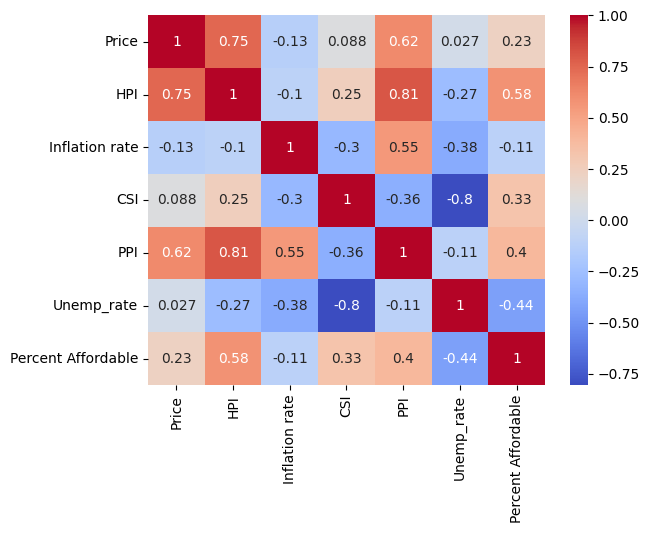

In [164]:
sns.heatmap(df_merged.corr(),cmap='coolwarm',annot=True)

The Prices have a high correlation with Housing price index obviously. 
But it also has significant correlation with Producer price index with respect to building materials and supplies dealers.

The other factors are low as they have opposite effect or indirectly proportional such as Customer sentiment Index (CSI), Percent affordable ,Inflation rate etc.

In [165]:
final_df = df_merged

Lets plot the regression graph for the most co-related features - HPI,PPI

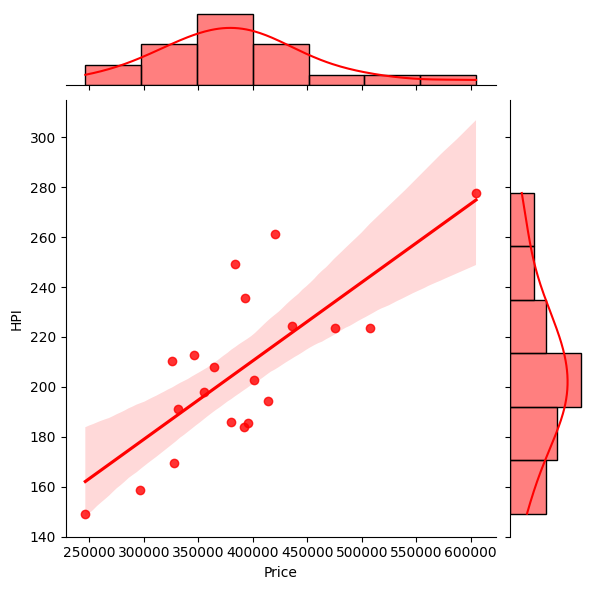

In [188]:
sns.jointplot(final_df,x='Price',y='HPI',kind='reg',color='red')

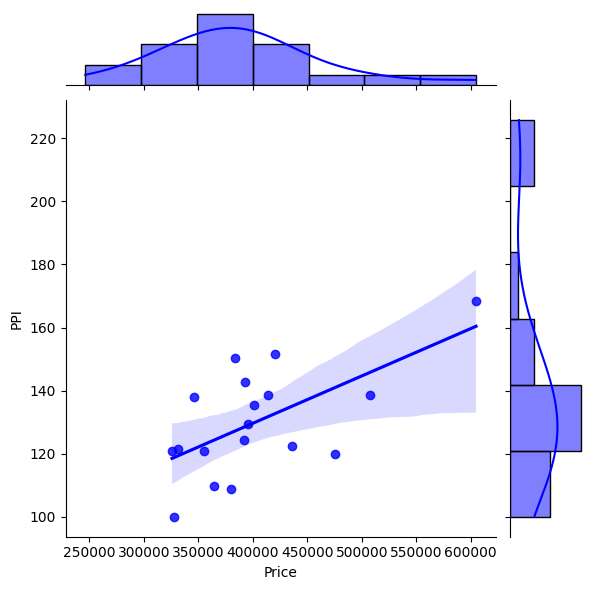

In [189]:
sns.jointplot(final_df,x='Price',y='PPI',kind='reg',color='blue')

Visualize null values

<AxesSubplot: ylabel='year'>

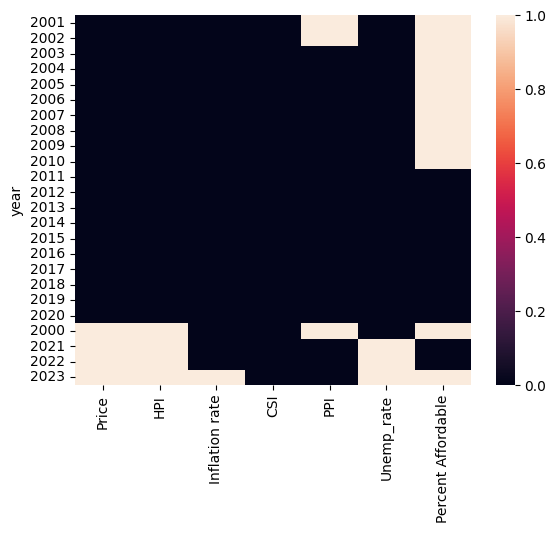

In [202]:
sns.heatmap(final_df.isnull())

In [206]:
final_df=final_df.reset_index()

In [208]:
final_df=final_df[(final_df['year']<2021)&(final_df['year']>2000)]

In [210]:
final_df.drop('Percent Affordable',axis=1,inplace=True)

In [213]:
final_df['PPI'].fillna(final_df['PPI'].mean(),inplace=True)

<AxesSubplot: >

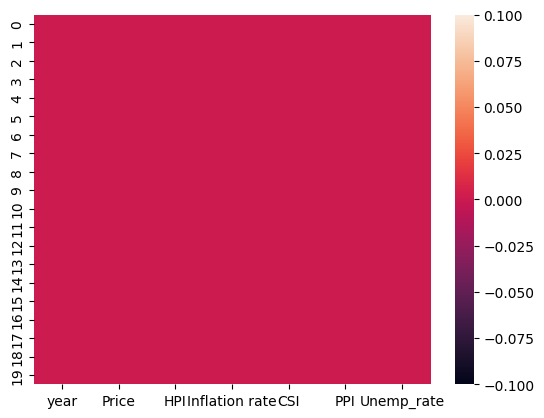

In [215]:
sns.heatmap(final_df.isnull())

Construct a simple linear regression model 

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [217]:
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [219]:
model = LinearRegression()

In [220]:
model.fit(X_train,y_train)

LinearRegression()

In [222]:
pred=model.predict(X_test)

In [224]:
model.intercept_

46847496.6515219

Info on variable importance of the features with their co-eff values

In [227]:
pd.DataFrame(model.coef_,X.columns,columns=["Coef"])

,Coef
year,-24037.388104
HPI,-69.984652
Inflation rate,29847.579567
CSI,4118.509948
PPI,10504.202247
Unemp_rate,22260.630153


C:\Users\mv25\AppData\Local\Temp\ipykernel_18132\731847810.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Price', ylabel='Density'>

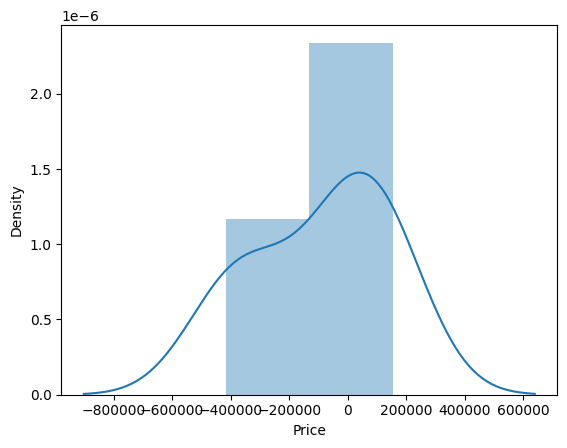

In [228]:
sns.distplot(y_test-pred)